In [1]:
%load_ext autoreload
%autoreload 2

from graphs import *
from gallagher_algorithm import *
import warnings
warnings.filterwarnings('error')
import networkx as nx
import numpy as np

In [2]:
eta = 0.01
seed = 6
n = 10

In [3]:
np.random.seed(seed)
D = np.random.randint(1, 3, size=(n,n))
G = Network(n, seed=seed, D=D)
phi = initializePhi(G)
G.phi = phi
score_0 = D_T(G)

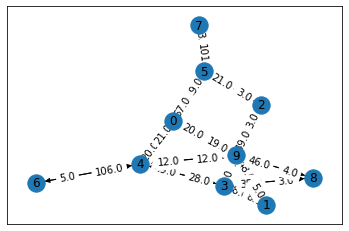

In [4]:
G.visualize(withEdgeTraffic=True);

In [6]:
print(score_0)
for _ in range(30):
    dR = calculateMarginals(G)
    #dR2 = calculateMarginals_v2(G, dR)
    #print(np.all(dR == dR2))
    tags = calculateBlocked(G, dR, eta)
    phi = updateRoutingTable(G, dR, tags, eta)
    G.phi = phi
    print(D_T(G))

1190.0
1189.9635944411662
1189.9582619425262
1189.9527601721006
1189.9470904177533
1189.941253949764
1189.9352520211871
1189.9290858681995
1189.922756710438
1189.9162657513293
1189.9096141784116
1189.9028031636465
1189.8958338637244
1189.888707420361
1189.8814249605864
1189.8739875970282
1189.8663964281845
1189.8586525386952
1189.8507569996
1189.842710868595
1189.8345151902827
1189.8261709964115
1189.8176793061157
1189.8090411261446
1189.8002574510888
1189.7913292636003
1189.7822575346067
1189.7730432235223
1189.7636872784522
1189.7541906363922
1189.7445542234252


In [ ]:
score_0, score_1

In [ ]:
phi0 = initializePhi(net)
x0 = net.converter.fromPhi(phi0)
#x0 = np.random.rand(net.df)

bounds = np.zeros((len(x0), 2))
bounds[:, 1] = 1

res = minimize(obj, x0=x0, args=(net), bounds=bounds)
phi_best = net.converter.toPhi(np.round(res.x, 4))

In [ ]:
obj(res.x, net), obj(x0, net)

In [ ]:
net.phi = phi0
print('D_T original: ', D_T(net))
og = net.F

net.phi = phi_best
print('D_T post optimization: ', D_T(net))
new = net.F

In [ ]:
net.visualize(withEdgeTraffic=True, layout='planar')
plt.gcf().set_size_inches(10, 10)

In [ ]:
from convex import *